In [197]:
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Loading, Data Cleaning and Preprocessing

- Data Loading
- Handle missing (NA) values and outliers.
- Identify and remove duplicates.


### 1.1. Data Loading

In [198]:
# Loading Datasets
Cab_Data = pd.read_csv('Cab_Data.csv')
City = pd.read_csv('City.csv')
Cust_ID = pd.read_csv('Customer_ID.csv')
Trans_ID = pd.read_csv('Transaction_ID.csv')

### 1.2. Initial Analysis, identifiing NA and duplicate values
#### Cab Data

In [199]:
print('Cab_Data:\n')
display(Cab_Data.head())
print(Cab_Data.shape)
print('\nMissing Values?:\n', Cab_Data.isnull().sum())
print('\nDuplicate Values?:\n', Cab_Data.duplicated().sum())
print('\nDuplicate Values - Transaction_ID?:\n', Cab_Data['Transaction ID'].duplicated().sum())
print('\nUnique Values?:\n', Cab_Data.nunique())

Cab_Data:



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


(359392, 7)

Missing Values?:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Duplicate Values?:
 0

Duplicate Values - Transaction_ID?:
 0

Unique Values?:
 Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64


#### City Data

In [200]:
print('City:\n')
display(City.head())
print(City.shape)
print('\nMissing Values?:\n', City.isnull().sum())
print('\nDuplicate Values?:\n', City.duplicated().sum())
print('\nUnique Values?:\n', City.nunique())

City:



,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


(20, 3)

Missing Values?:
 City          0
Population    0
Users         0
dtype: int64

Duplicate Values?:
 0

Unique Values?:
 City          20
Population    20
Users         20
dtype: int64


#### Customer ID Data

In [201]:
print('Customer_ID:\n')
display(Cust_ID.head())
print(Cust_ID.shape)
print('\nMissing Values?:\n', Cust_ID.isnull().sum())
print('\nDuplicate Values?:\n', Cust_ID.duplicated().sum())
print('\nDuplicate Values - Customer ID?:\n', Cust_ID['Customer ID'].duplicated().sum())
print('\nUnique Values?:\n', Cust_ID.nunique())

Customer_ID:



,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


(49171, 4)

Missing Values?:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Duplicate Values?:
 0

Duplicate Values - Customer ID?:
 0

Unique Values?:
 Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64


#### Transaction ID Data

In [202]:
print('Transaction_ID:\n')
display(Trans_ID.head())
print(Trans_ID.shape)
print('\nMissing Values?:\n', Trans_ID.isnull().sum())
print('\nDuplicate Values?:\n', Trans_ID.duplicated().sum())
print('\nDuplicate Values - Transaction_ID?:\n', Trans_ID['Transaction ID'].duplicated().sum())
print('\nDuplicate Values - Customer ID?:\n', Trans_ID['Customer ID'].duplicated().sum())
print('\nUnique Values?:\n', Trans_ID.nunique())

Transaction_ID:



,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


(440098, 3)

Missing Values?:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Duplicate Values?:
 0

Duplicate Values - Transaction_ID?:
 0

Duplicate Values - Customer ID?:
 390927

Unique Values?:
 Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64


#### 1.2.1. Unique Values Count & Identifying potential relationships across the datasets

- Payment Mode: 2 modes (cash and card).
- Gender: 2 genders (Male and Female).
- Company: 2 cab companies.
- City: Data spans across 19 cities.

Across all datasets no duplicates were detected, except for the duplications of 'Customer ID's' in the Transaction_ID dataset, which understandably means that customers are likely to have multiple transactions.

Transaction IDs:
- Cab_Data.csv contains 359,392 unique transaction IDs.
- Transaction_ID.csv contains 440,098 unique transaction IDs.
- There are 359,392 common transaction IDs between these two datasets.

This indicates that every transaction ID in Cab_Data.csv is also present in Transaction_ID.csv, but Transaction_ID.csv has additional transaction IDs not found in Cab_Data.csv.

Customer IDs:
- Customer_ID.csv contains 49,171 unique customer IDs.
- Transaction_ID.csv also contains 49,171 unique customer IDs.
- All customer IDs in Customer_ID.csv are present in Transaction_ID.csv and vice versa.

This suggests a direct relationship between these two datasets where each unique transaction is linked to a unique customer.

In [203]:
# Identifying potential relationships across the datasets

# Checking unique values and overlap in 'Transaction ID' between Cab_Data and Trans_ID
unique_Trans_ID_cab_data = Cab_Data['Transaction ID'].nunique()
unique_Trans_ID_Trans_ID = Trans_ID['Transaction ID'].nunique()
common_Trans_ID = set(Cab_Data['Transaction ID']).intersection(set(Trans_ID['Transaction ID']))

# Checking unique values and overlap in 'Customer ID' between Cust_ID and Trans_ID
unique_Cust_IDs_Cust_ID = Cust_ID['Customer ID'].nunique()
unique_Cust_IDs_Trans_ID= Trans_ID['Customer ID'].nunique()
common_Cust_IDs = set(Cust_ID['Customer ID']).intersection(set(Trans_ID['Customer ID']))

{
    "Unique Transaction_ID Cab_Data": unique_Trans_ID_cab_data,
    "Unique Transaction_ID Trans_ID": unique_Trans_ID_Trans_ID,
    "Common Transaction_ID's": len(common_Trans_ID),
    "Unique Customer_IDs Cust_ID": unique_Cust_IDs_Cust_ID,
    "Unique Customer_IDs Trans_ID": unique_Cust_IDs_Trans_ID,
    "Common Customer_IDs": len(common_Cust_IDs)
}


{'Unique Transaction_ID Cab_Data': 359392,
 'Unique Transaction_ID Trans_ID': 440098,
 "Common Transaction_ID's": 359392,
 'Unique Customer_IDs Cust_ID': 49171,
 'Unique Customer_IDs Trans_ID': 49171,
 'Common Customer_IDs': 49171}

# 2. Master Data Synthesis (Dataset Integration) & Data Transformations & Feature Engineering

- Merge 'Transaction ID' with 'Customer ID': Using the 'Customer ID' field, we can link transaction details to customer demographics.
- Merge the resulting dataset with 'Cab Data': Using the 'Transaction ID' field, we can link the combined transaction-customer dataset with specific cab trip details.
- Merge with 'City': The 'City' dataset can be merged based on the 'City' field in the 'Cab Data' to add city-specific details like population and number of cab users.

## 2.1. Merging Data

There are more transaction IDs in the 'Transaction ID' dataframe than there are in the 'Cab_Data'. When joining the dataframes 80706 were found to be missing data. Given that analysis is primarily focused on the company of the cab, and the missing values does not have data on this, that data would be not valuable towards assessing which cab company should be invested in. Therefore the transactions with missing data were dropped.

In [204]:
# Joining datasets

# Merging datasets
# First, merge 'transaction_id' with 'customer_id'
merged_data = pd.merge(Trans_ID, Cust_ID, on='Customer ID', how='left')

# Next, merge the resulting dataset with 'cab_data'
merged_data_2 = pd.merge(merged_data, Cab_Data, on='Transaction ID', how='left')

# Finally, merge with 'city' data
master_data = pd.merge(merged_data_2, City, on='City', how='left')


# Display the first few rows of the merged data to verify the join
master_data.head()



,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [205]:
master_data.shape

(440098, 14)

In [206]:
master_data.isna().sum()

Transaction ID            0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Population            80706
Users                 80706
dtype: int64

In [207]:
master_data = master_data.dropna()
master_data.shape

(359392, 14)

## 2.1. Data Transformations & Feature Engineering

In [208]:
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'] - 2, unit='D', origin='1900-01-01')

# master_data['Date of Travel'] - 2: Adjusts for the Excel leap year bug.
# unit='D': Specifies that the conversion unit is in days.
# origin='1900-01-01': Sets the start date for the Excel serial date format.

# Adding 'Year' column to the merged dataset 
master_data['Year'] = master_data['Date of Travel'].dt.year
# Adding 'Year' column to the merged dataset 
master_data['Month'] = master_data['Date of Travel'].dt.month
# Adding 'Year' column to the merged dataset 
master_data['Day'] = master_data['Date of Travel'].dt.day_of_week

In [209]:
# Calculating profit and margin for each ride
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data['Margin'] = master_data['Profit'] / master_data['Price Charged']
master_data['Profit per KM'] = master_data['Profit'] / master_data['KM Travelled']

In [210]:
# Income bins definition
bins = [2000, 14334, 26667, 35001]
labels = ['Low Income (2K-14.3K)', 'Middle Income (14.3K-26.7K)', 'High Income (26.7K-35K)']
# Note the shift by one so both the lower limit and upper limits are included

# Assigning each customer to an income group
master_data['Income Group'] = pd.cut(master_data['Income (USD/Month)'], bins=bins, labels=labels, right=False)

In [211]:
# Display the first few rows of the data to verify the changes
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,...,Cost of Trip,Population,Users,Year,Month,Day,Profit,Margin,Profit per KM,Income Group
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,...,313.635,"814,885","24,701",2016,1,4,57.315,0.154509,1.882266,Low Income (2K-14.3K)
1,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,...,334.854,"814,885","24,701",2016,1,2,23.666,0.066010,0.826904,Low Income (2K-14.3K)
2,10000013,28712,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,...,97.632,"814,885","24,701",2016,1,5,27.568,0.220192,3.049558,Low Income (2K-14.3K)
3,10000014,28020,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,...,351.602,"814,885","24,701",2016,1,3,25.798,0.068357,0.777751,Middle Income (14.3K-26.7K)
4,10000015,27182,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,...,97.776,"814,885","24,701",2016,1,6,16.844,0.146955,1.929439,Low Income (2K-14.3K)


# 3. Exploritory Data Analysis
## 3.1. Data Profiling / Descriptive Statistics

Descriptive Statistics:

- Transaction ID: Ranges from 10,000,011 to 10,440,110.
- KM Travelled: Average distance travelled is about 22.57 km, with a range from 1.9 km to 48 km.
- Price Charged: Averages at $423.44, with a wide range from $15.60 to $2048.03.
- Cost of Trip: Average cost is $286.19, ranging from $19.00 to $691.20.
- Customer ID: Ranges from 1 to 60,000.
- Age: Customers range from 18 to 65 years old, with an average age of approximately 35 years.
- Income (USD/Month): Averages at $15,048.82, ranging from $2,000 to $35,000.

In [212]:

# Descriptive Statistics
master_data.describe()


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Profit,Margin,Profit per KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,2017.045199,7.500434,3.750620,137.253198,0.271284,6.083579
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,0.800239,3.445095,1.858849,160.311840,0.185501,5.543493
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,2016.000000,1.000000,0.000000,-220.060000,-0.693015,-4.998235
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,2016.000000,5.000000,3.000000,28.012000,0.138559,2.000385
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,2017.000000,8.000000,4.000000,81.962000,0.264303,4.466809
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,2018.000000,10.000000,5.000000,190.030000,0.416120,9.170006
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,2018.000000,12.000000,6.000000,1463.966000,0.762026,41.115556


## 3.2. Cab Company Analysis

### Hypothesis to answer
- Which company has a higher profit rate? - Annual Profit Rate 
- Market share of Yellow cab?
- Which company is the most popular in each city
- Does the which company is likely to make more profit in future using a prediction
- Is profit related to area, i.e. certain areas likely to generate more profit.
- Is there an age preference for each company
- Is there a preference in payments methods for each company, does this effect profit
- Is there a preference in gender for each company
- Is there a preference in income ranges for each company
- Are longer journeys preferred for a specific company


### Average Price (per Trip) Charged by Company
Average Price Charged by Company:
"Pink Cab" and "Yellow Cab" have different average pricing strategies.
"Yellow Cab" seems to charge more on average compared to "Pink Cab".

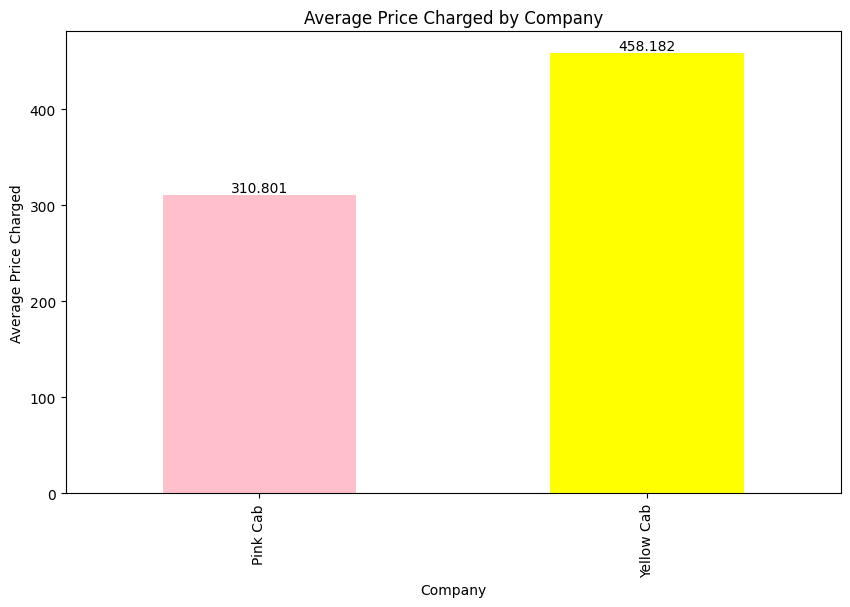

In [213]:
# Average Price Charged by Company
average_price_by_company = master_data.groupby('Company')['Price Charged'].mean()
plt.figure(figsize=(10, 6))

ax = average_price_by_company.plot(kind='bar', color=['pink', 'yellow'])

# Add labels to each bar
ax.bar_label(ax.containers[0])

plt.title('Average Price Charged by Company')
plt.xlabel('Company')
plt.ylabel('Average Price Charged')

plt.show()

## Overall Profit Analysis

### Average Profit (per Trip) Charged by Company

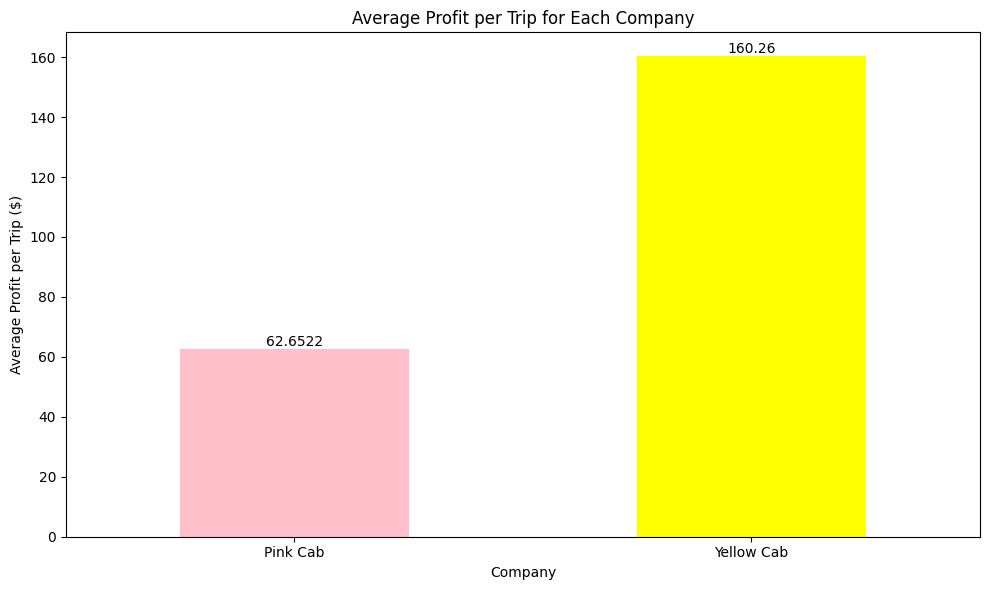

In [214]:
# Calculating average profit per trip overall and per year for each company

# Overall average profit per trip for each company
overall_avg_profit_per_trip = master_data.groupby('Company')['Profit'].mean()

plt.figure(figsize=(10, 6))

ax = overall_avg_profit_per_trip.plot(kind='bar', color=['pink', 'yellow'])

# Add labels to each bar
ax.bar_label(ax.containers[0])

plt.title('Average Profit per Trip for Each Company')
plt.ylabel('Average Profit per Trip ($)')
plt.xlabel('Company')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



### Average Profit (per Customer) Charged by Company

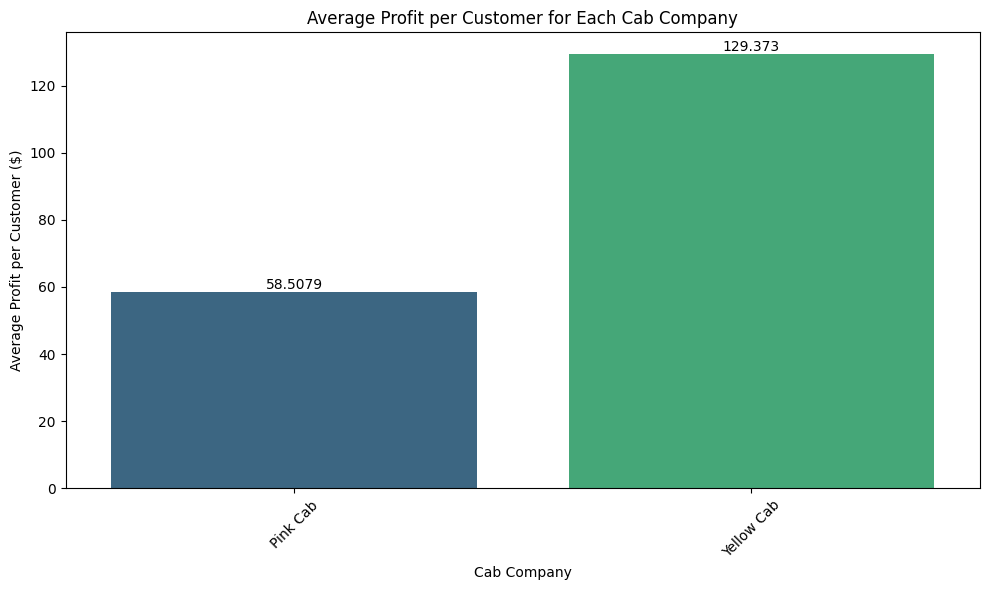

In [215]:
# Calculating average profit per customer for each cab company
avg_profit_per_customer = master_data.groupby(['Company', 'Customer ID'])['Profit'].mean().groupby('Company').mean()


# Visualizing Average Profit per Customer for each Cab Company
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=avg_profit_per_customer.index, y=avg_profit_per_customer.values, palette="viridis")
# Add labels to each bar
ax.bar_label(ax.containers[0])


plt.title('Average Profit per Customer for Each Cab Company')
plt.ylabel('Average Profit per Customer ($)')
plt.xlabel('Cab Company')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Average Profit (per KM) Charged by Company

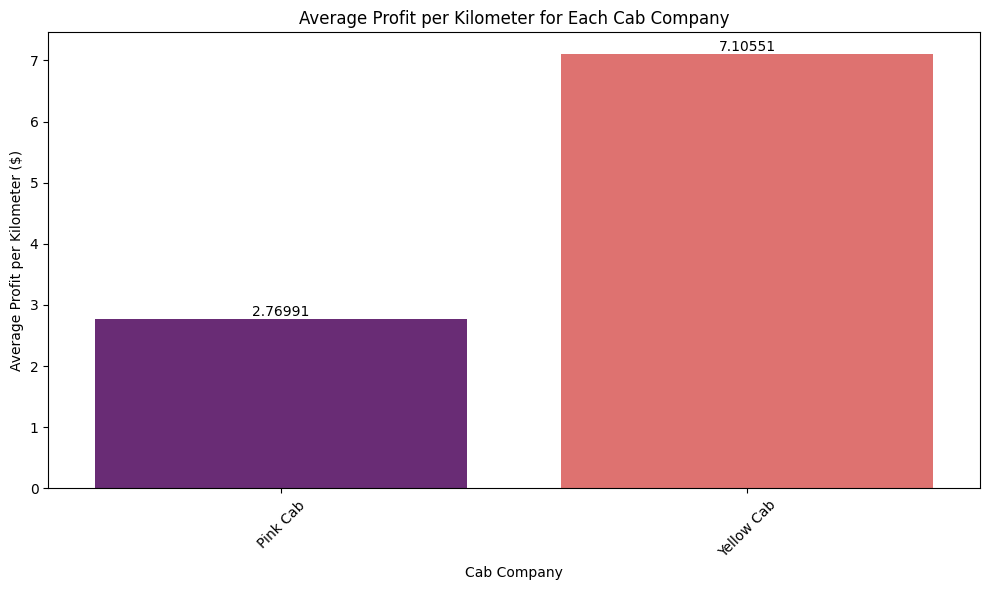

In [216]:
# Calculating average profit per km for each cab company
avg_profit_per_km = master_data.groupby('Company')['Profit per KM'].mean()

# Visualizing Average Profit per Kilometer for each Cab Company
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_profit_per_km.index, y=avg_profit_per_km.values, palette="magma")

# Add labels to each bar
ax.bar_label(ax.containers[0])

plt.title('Average Profit per Kilometer for Each Cab Company')
plt.ylabel('Average Profit per Kilometer ($)')
plt.xlabel('Cab Company')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

### Cash vs. Card Profit Analysis

Analysis
- Total Profit: Yellow Cab shows significantly higher total profits than Pink Cab for both payment modes. Additionally, for both companies, card payments contribute to a higher total profit than cash payments.
- Average Profit per Transaction: The average profit per transaction is relatively similar for both payment modes within each company. However, Yellow Cab's average profit per transaction is substantially higher than that of Pink Cab, regardless of the payment mode.
- Company Specific Trends: Both Pink Cab and Yellow Cab show higher total profits from card payments compared to cash, which might reflect a general preference or higher frequency of card usage among their customers. The average profits per transaction are consistent across payment modes within each company.

This analysis suggests that card payments play a more significant role in the revenue of both cab companies, with Yellow Cab leading in profitability both in total and on average per transaction

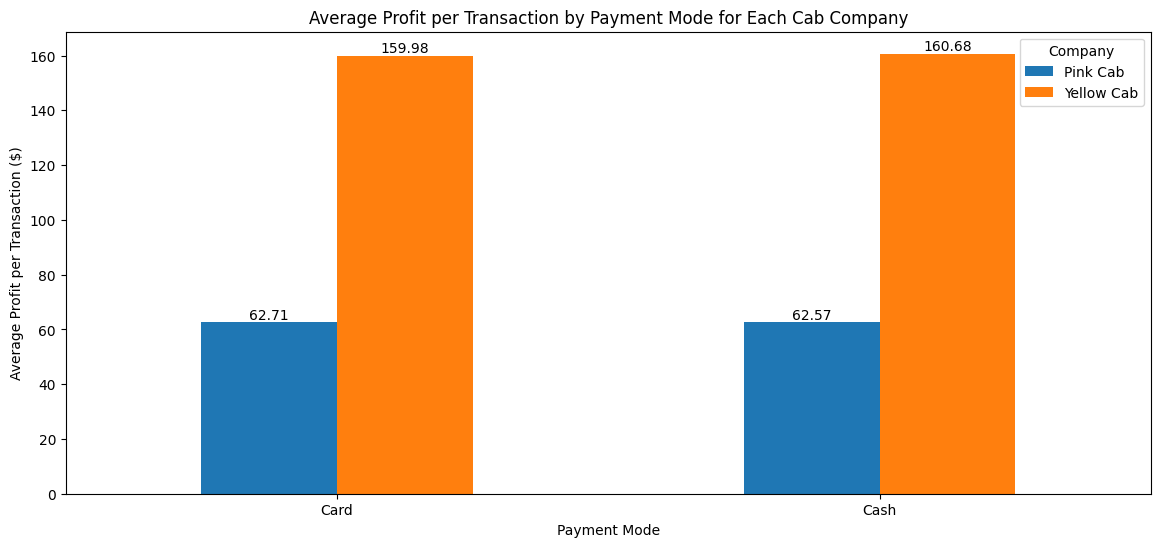

In [217]:

# Grouping by Payment Mode and Company to calculate total and average profit
average_profit_by_payment_mode = master_data.groupby(['Payment_Mode', 'Company'])['Profit'].mean().unstack()

# Total Profit by Payment Mode for Each Cab Company
plt.figure(figsize=(14, 6))

# Average Profit by Payment Mode for Each Cab Company
average_profit_bar = average_profit_by_payment_mode.plot(kind='bar', rot=0, ax=plt.gca())

# Add labels to each bar
for container in average_profit_bar.containers:
    average_profit_bar.bar_label(container, fmt='%.2f', label_type='edge')

# Set the title and labels
plt.title('Average Profit per Transaction by Payment Mode for Each Cab Company')
plt.ylabel('Average Profit per Transaction ($)')
plt.xlabel('Payment Mode')

# Show the plot
plt.show()


## Time and Seasonality Trip Analysis 

### Comparison of Cab Companies Number of Trips

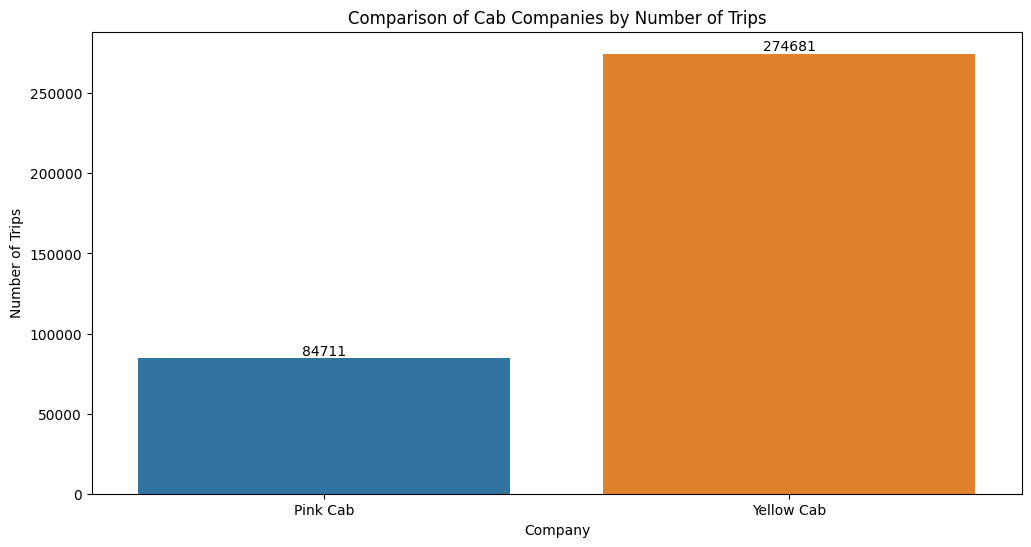

In [218]:
# Comparison of Trips of Two Cab Companies
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=master_data, x='Company')

# Add labels to each bar
ax.bar_label(ax.containers[0])
plt.title('Comparison of Cab Companies by Number of Trips')
plt.xlabel('Company')
plt.ylabel('Number of Trips')

plt.show()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

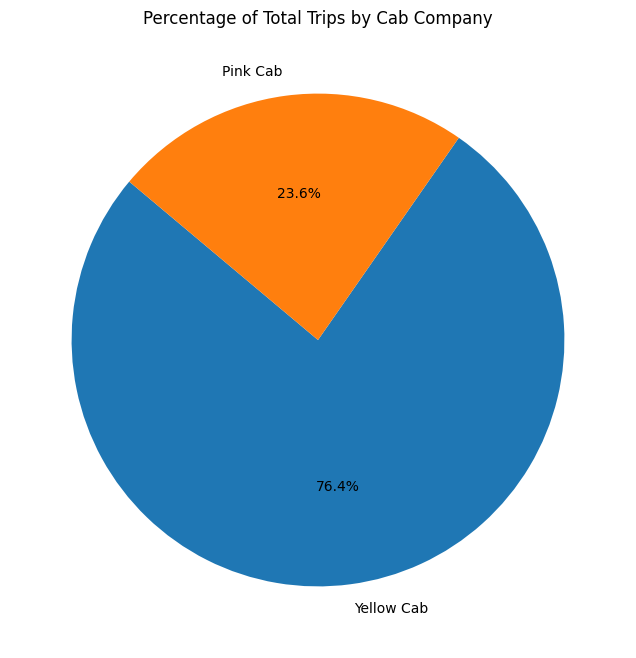

In [219]:
trip_counts = master_data['Company'].value_counts()

display(trip_counts)

plt.figure(figsize=(8, 8))
plt.pie(trip_counts, labels=trip_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Trips by Cab Company')
plt.show()


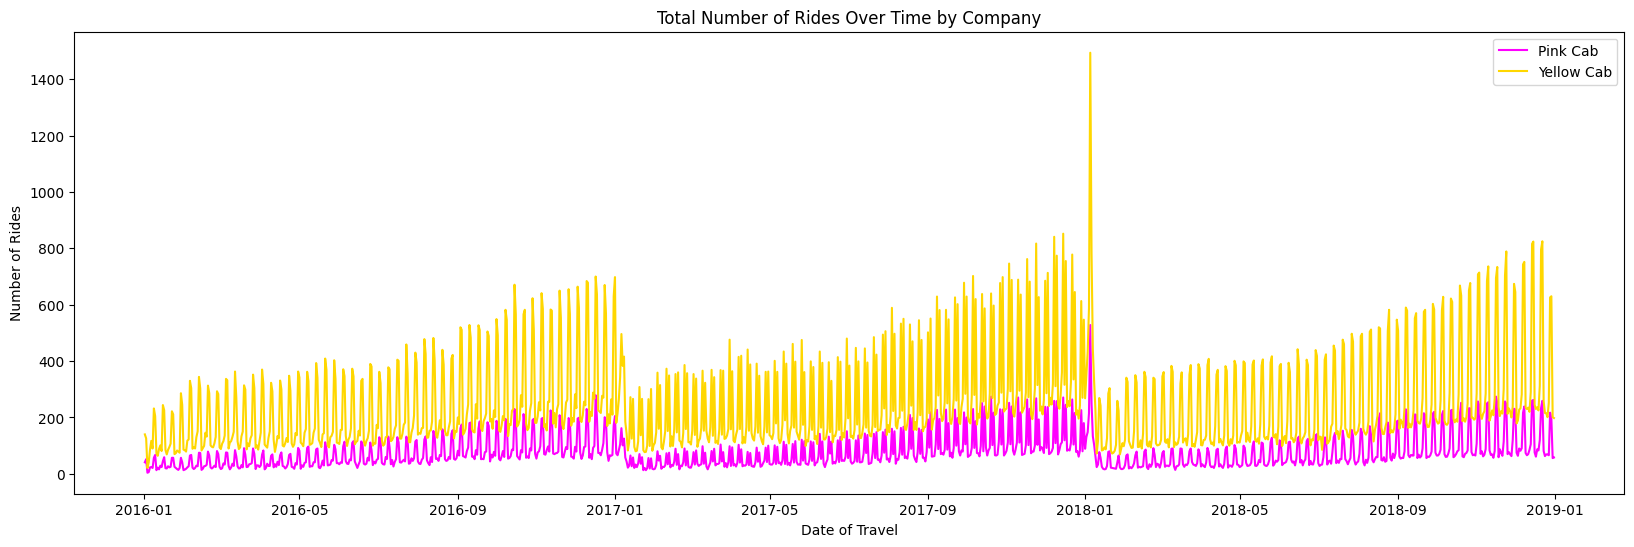

In [220]:
# Aggregating data by company and date
company_aggregate = master_data.groupby(['Date of Travel', 'Company']).agg(Total_Rides=('Transaction ID', 'count')).reset_index()

# Separating data for each company
pink_cab_data = company_aggregate[company_aggregate['Company'] == 'Pink Cab']
yellow_cab_data = company_aggregate[company_aggregate['Company'] == 'Yellow Cab']

# Plotting number of rides and average profit for each company
plt.figure(figsize=(20, 6))

# Plot for Number of Rides
sns.lineplot(x='Date of Travel', y='Total_Rides', data=pink_cab_data, label='Pink Cab', color='magenta')
sns.lineplot(x='Date of Travel', y='Total_Rides', data=yellow_cab_data, label='Yellow Cab', color='gold')
plt.title('Total Number of Rides Over Time by Company')
plt.ylabel('Number of Rides')
plt.legend()

plt.show()

## Time and Seasonality Profit Analysis 

### Average Profit (per trip) by Company for each year

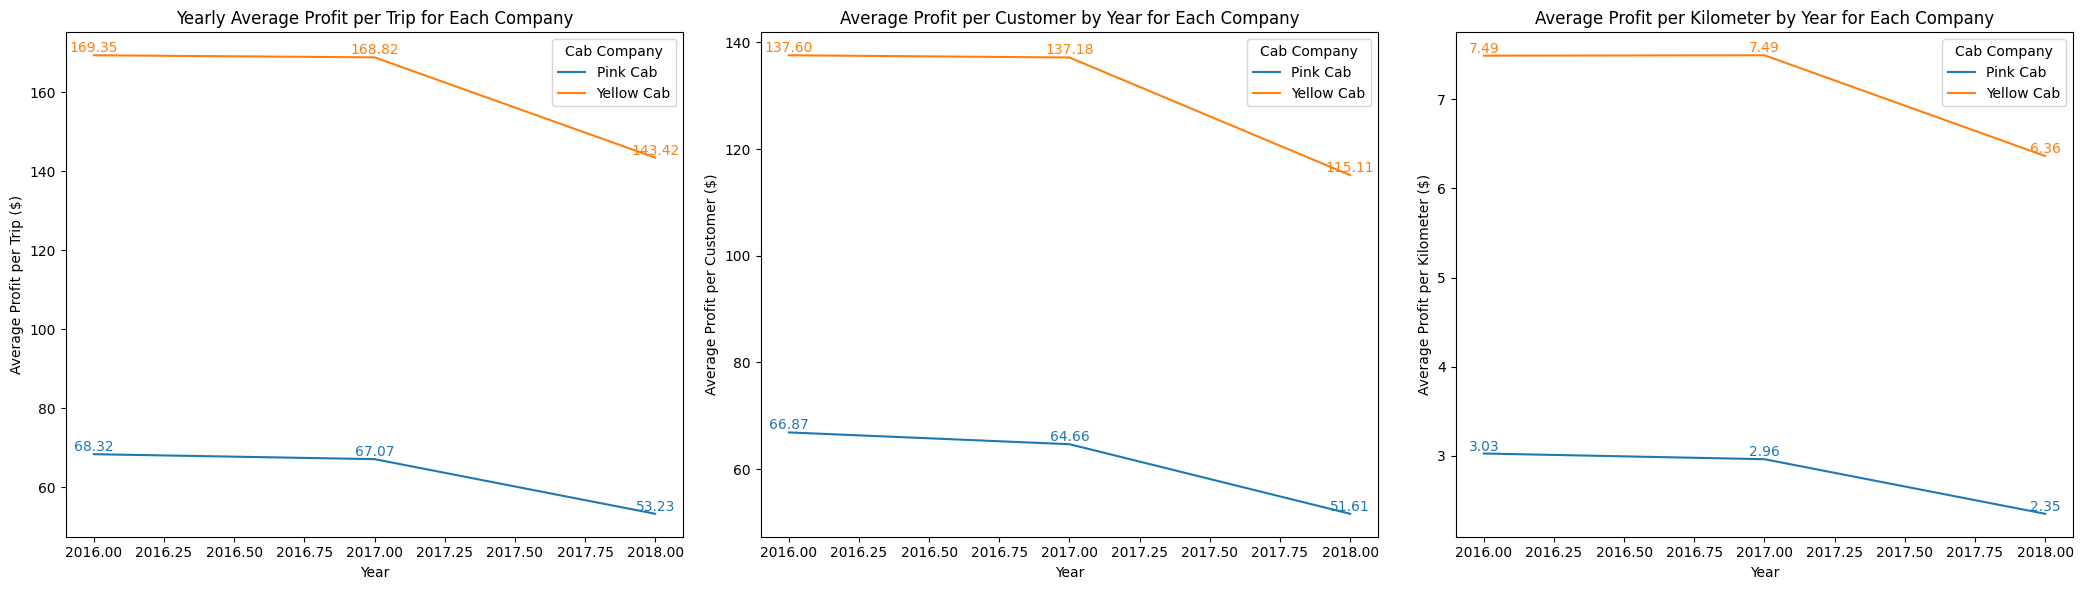

In [241]:
# Average profit per trip per year for each company
yearly_avg_profit_per_trip = master_data.groupby(['Year', 'Company'])['Profit'].mean().unstack()

# Grouping by Year, Company, and Customer ID to calculate average profit per customer
avg_profit_per_customer_yearly = master_data.groupby(['Year', 'Company', 'Customer ID']).agg({'Profit': 'mean'}).reset_index().groupby(['Year', 'Company'])['Profit'].mean()
avg_profit_per_customer_df = avg_profit_per_customer_yearly.unstack()

# Grouping by Year and Company to calculate average profit per km
avg_profit_per_km_yearly = master_data.groupby(['Year', 'Company'])['Profit per KM'].mean()
avg_profit_per_km_df = avg_profit_per_km_yearly.unstack()


# Creating a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Plotting Yearly Average Profit per Trip for Each Company
yearly_avg_profit_per_trip.plot(kind='line', ax=axes[0])
axes[0].set_title('Average Profit per Trip by Year for Each Company')
axes[0].set_ylabel('Average Profit per Trip ($)')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Cab Company')

# Annotating the first graph
for line in axes[0].get_lines():
    y = line.get_ydata()
    x = line.get_xdata()
    for i in range(len(x)):
        axes[0].text(x[i], y[i], f'{y[i]:.2f}', color=line.get_color(), ha='center', va='bottom')

# Plotting Average Profit per Customer by Year for Each Company
avg_profit_per_customer_df.plot(kind='line', ax=axes[1])
axes[1].set_title('Average Profit per Customer by Year for Each Company')
axes[1].set_ylabel('Average Profit per Customer ($)')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Cab Company')

# Annotating the second graph
for line in axes[1].get_lines():
    y = line.get_ydata()
    x = line.get_xdata()
    for i in range(len(x)):
        axes[1].text(x[i], y[i], f'{y[i]:.2f}', color=line.get_color(), ha='center', va='bottom')

# Plotting Average Profit per Kilometer by Year for Each Company
avg_profit_per_km_df.plot(kind='line', ax=axes[2])
axes[2].set_title('Average Profit per Kilometer by Year for Each Company')
axes[2].set_ylabel('Average Profit per Kilometer ($)')
axes[2].set_xlabel('Year')
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Cab Company')

# Annotating the third graph
for line in axes[2].get_lines():
    y = line.get_ydata()
    x = line.get_xdata()
    for i in range(len(x)):
        axes[2].text(x[i], y[i], f'{y[i]:.2f}', color=line.get_color(), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

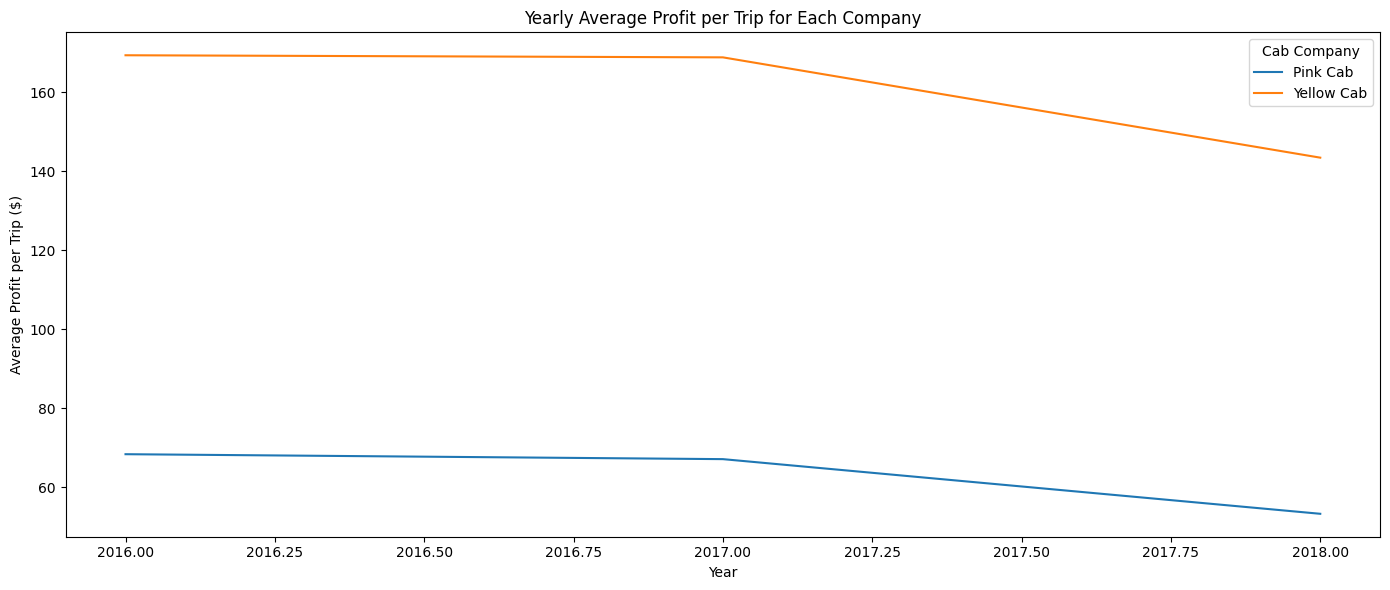

In [221]:


# Average profit per trip per year for each company
yearly_avg_profit_per_trip = master_data.groupby(['Year', 'Company'])['Profit'].mean().unstack()

# Plotting Overall Average Profit per Trip for Each Company
plt.figure(figsize=(14, 6))


# Plotting Yearly Average Profit per Trip for Each Company
yearly_avg_profit_per_trip.plot(kind='line', ax=plt.gca())
plt.title('Yearly Average Profit per Trip for Each Company')
plt.ylabel('Average Profit per Trip ($)')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Cab Company')

plt.tight_layout()
plt.show()


### Average Profit (per Customer) by Company for each year

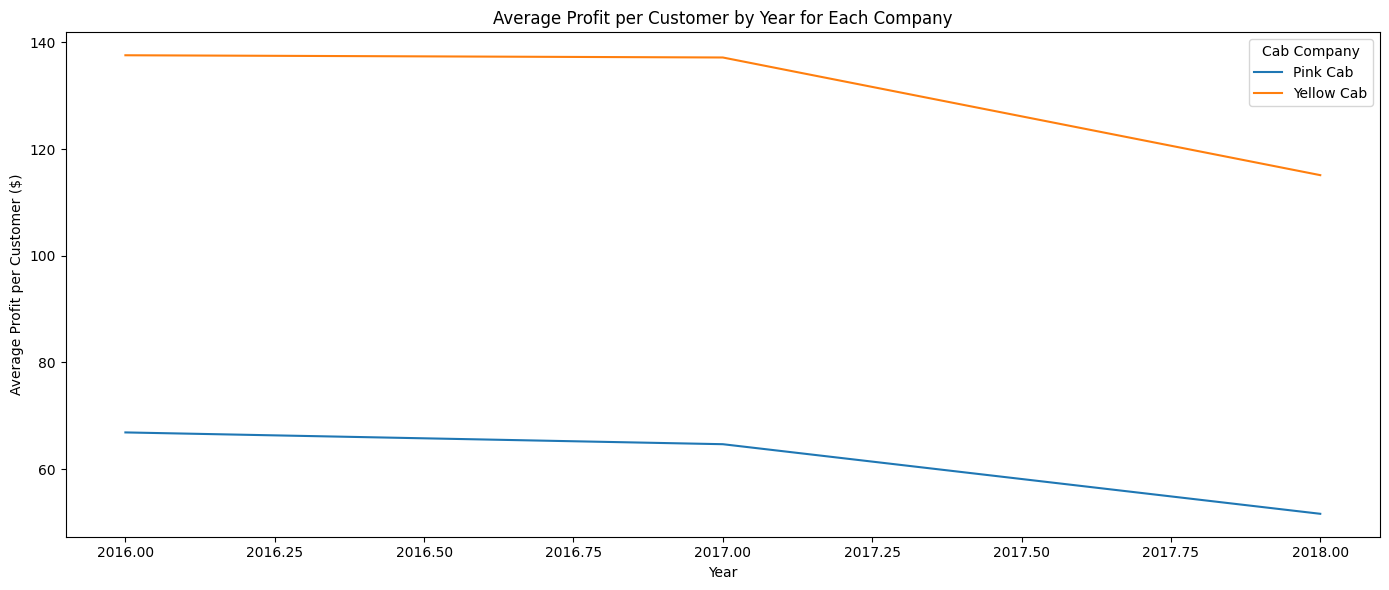

In [240]:


# Grouping by Year, Company, and Customer ID to calculate average profit per customer
avg_profit_per_customer_yearly = master_data.groupby(['Year', 'Company', 'Customer ID']).agg({'Profit': 'mean'}).reset_index().groupby(['Year', 'Company'])['Profit'].mean()

# Converting the series to DataFrames for plotting
avg_profit_per_customer_df = avg_profit_per_customer_yearly.unstack()

# Plotting Average Profit per Customer by Year for Each Company
plt.figure(figsize=(14, 6))

avg_profit_per_customer_df.plot(kind='line', ax=plt.gca())
plt.title('Average Profit per Customer by Year for Each Company')
plt.ylabel('Average Profit per Customer ($)')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Cab Company')


plt.tight_layout()
plt.show()





### Average Profit (per KM) by Company for each year

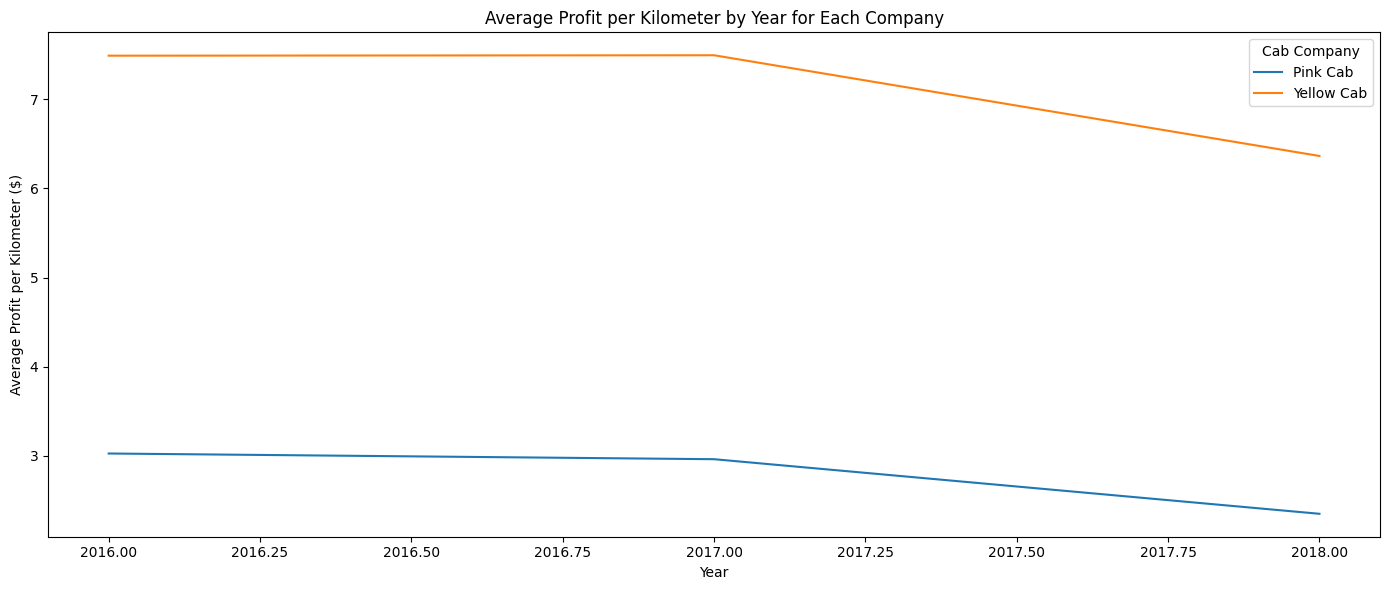

In [223]:
# Grouping by Year and Company to calculate average profit per km
avg_profit_per_km_yearly = master_data.groupby(['Year', 'Company'])['Profit per KM'].mean()

avg_profit_per_km_df = avg_profit_per_km_yearly.unstack()

plt.figure(figsize=(14, 6))

# Plotting Average Profit per Kilometer by Year for Each Company
avg_profit_per_km_df.plot(kind='line', ax=plt.gca())
plt.title('Average Profit per Kilometer by Year for Each Company')
plt.ylabel('Average Profit per Kilometer ($)')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Cab Company')

plt.tight_layout()
plt.show()

### Time Series Analysis: Number of Rides and Profit

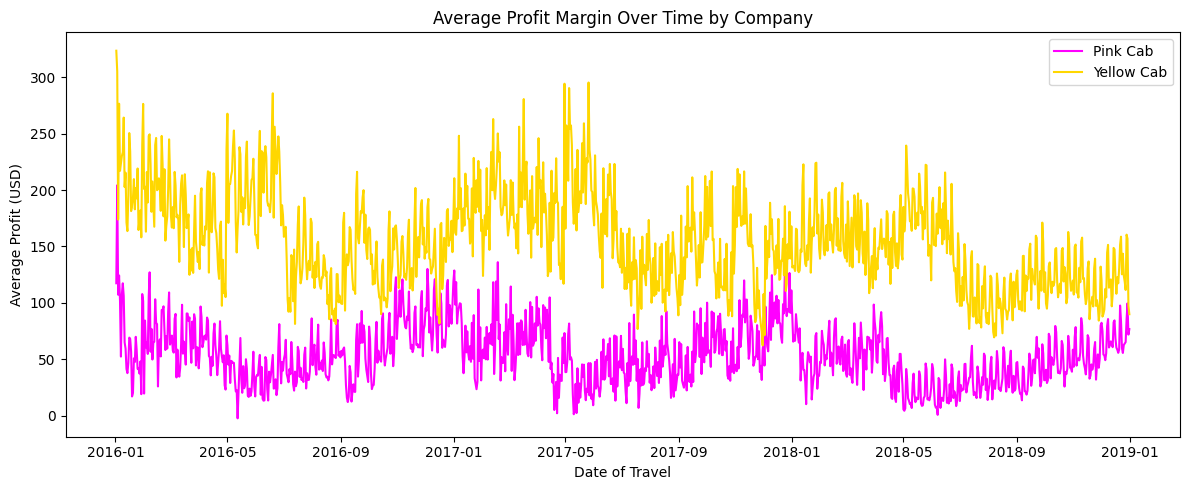

In [238]:
# Aggregating data by company and date
company_aggregate = master_data.groupby(['Date of Travel', 'Company']).agg(
    Total_Rides=('Transaction ID', 'count'),
    Average_Profit=('Profit', 'mean')
).reset_index()

# Separating data for each company
pink_cab_data = company_aggregate[company_aggregate['Company'] == 'Pink Cab']
yellow_cab_data = company_aggregate[company_aggregate['Company'] == 'Yellow Cab']

# Plotting number of rides and average profit for each company
plt.figure(figsize=(12, 5))

# Plot for Average Profit
sns.lineplot(x='Date of Travel', y='Average_Profit', data=pink_cab_data, label='Pink Cab', color='magenta')
sns.lineplot(x='Date of Travel', y='Average_Profit', data=yellow_cab_data, label='Yellow Cab', color='gold')
plt.title('Average Profit Margin Over Time by Company')
plt.ylabel('Average Profit (USD)')
plt.legend()

plt.tight_layout()
plt.show()

## Area Analysis

### Company specific area distribution of number of rides 

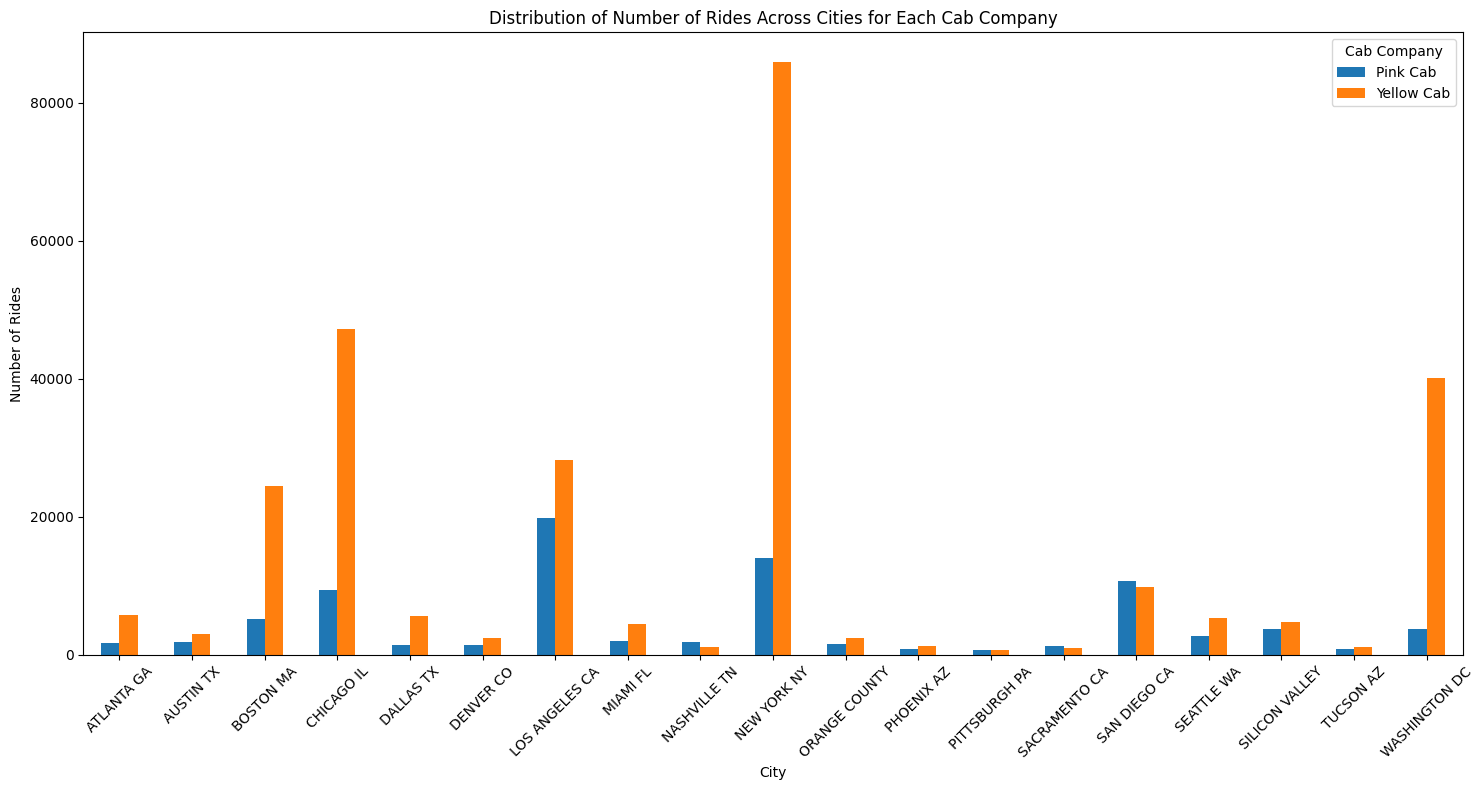

In [225]:
# Grouping the data by City and Company to calculate the number of rides
rides_by_city_company = master_data.groupby(['City', 'Company']).size().unstack()

# Plotting the distribution of number of rides for each company across cities
plt.figure(figsize=(15, 8))
rides_by_city_company.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Number of Rides Across Cities for Each Cab Company')
plt.ylabel('Number of Rides')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Cab Company')
plt.tight_layout()

# Displaying the plot
plt.show()


### Company specific area distribution of profits

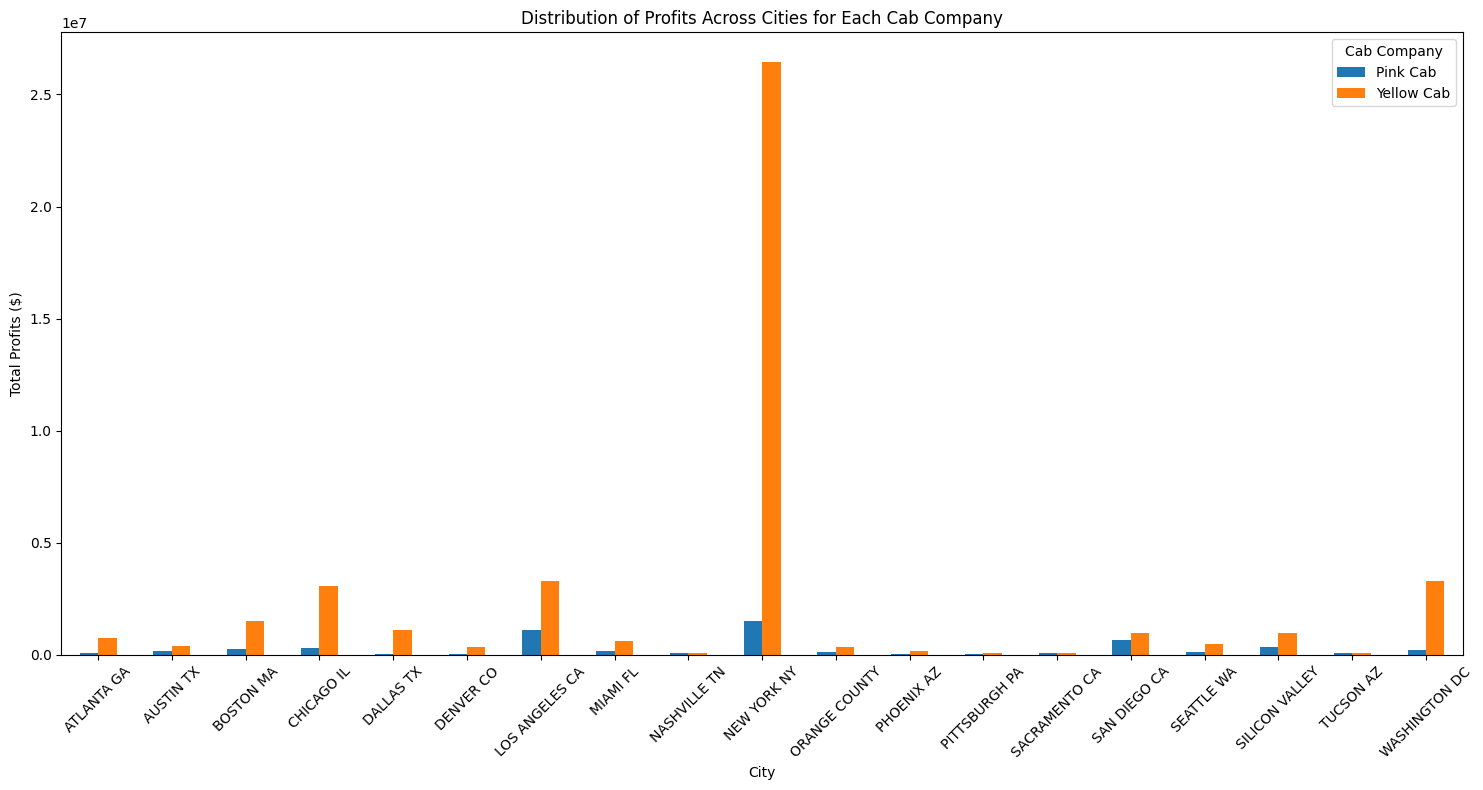

In [226]:
# Grouping the data by City and Company to calculate the total profits
profits_by_city_company = master_data.groupby(['City', 'Company'])['Profit'].sum().unstack()

# Plotting the distribution of profits for each company across cities
plt.figure(figsize=(15, 8))
profits_by_city_company.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Profits Across Cities for Each Cab Company')
plt.ylabel('Total Profits ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Cab Company')
plt.tight_layout()

# Displaying the plot
plt.show()


## Customer Demographics Analysis

### Customer Demographics: Number of Customers per Company

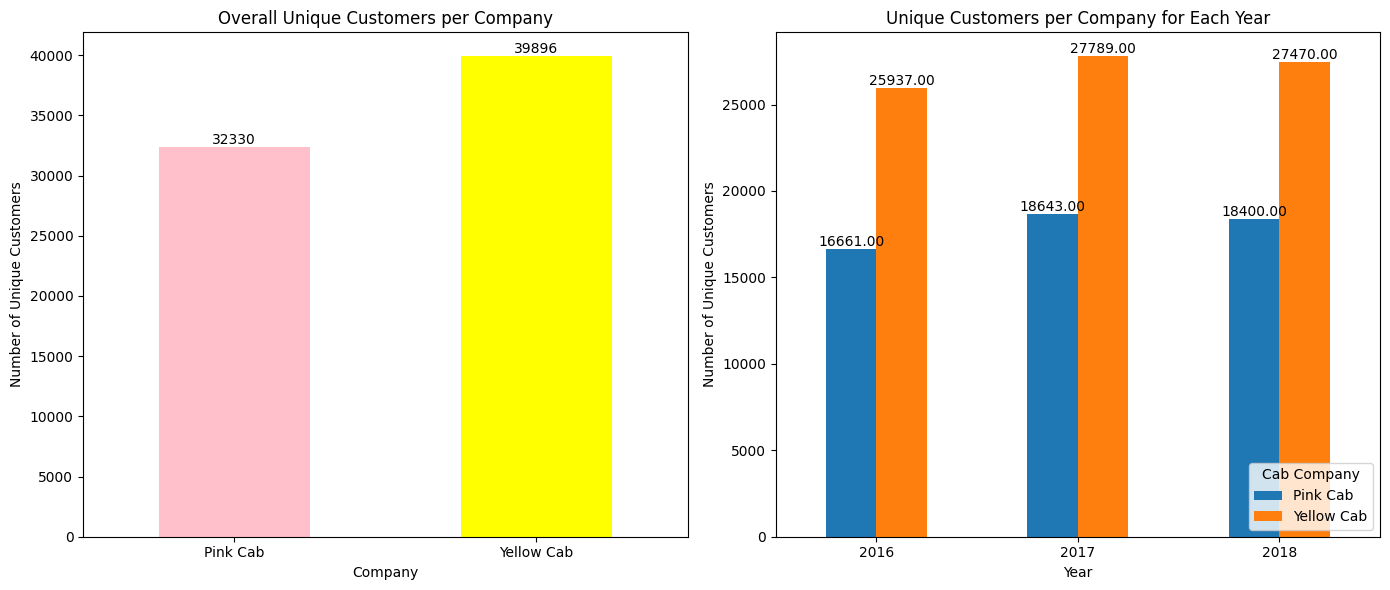

In [227]:
# Calculating the total number of unique customers per company overall and for each year

# Overall unique customers per company
overall_customers_per_company = master_data.groupby('Company')['Customer ID'].nunique()

# Unique customers per company for each year
customers_per_company_yearly = master_data.groupby(['Year', 'Company'])['Customer ID'].nunique().unstack()

# Displaying the results
overall_customers_per_company, customers_per_company_yearly

# Creating visuals for the number of unique customers per company overall and per year

# Plotting Overall Unique Customers per Company
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax = overall_customers_per_company.plot(kind='bar', color=['pink', 'yellow'])
ax.bar_label(ax.containers[0])
plt.title('Overall Unique Customers per Company')
plt.ylabel('Number of Unique Customers')
plt.xlabel('Company')
plt.xticks(rotation=0)

# Plotting Unique Customers per Company for Each Year
plt.subplot(1, 2, 2)
ax = customers_per_company_yearly.plot(kind='bar', ax=plt.gca())

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title('Unique Customers per Company for Each Year')
plt.ylabel('Number of Unique Customers')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Cab Company', loc='lower right')

plt.tight_layout()
plt.show()


### Customer Demographics: Age distribution plots for each cab company

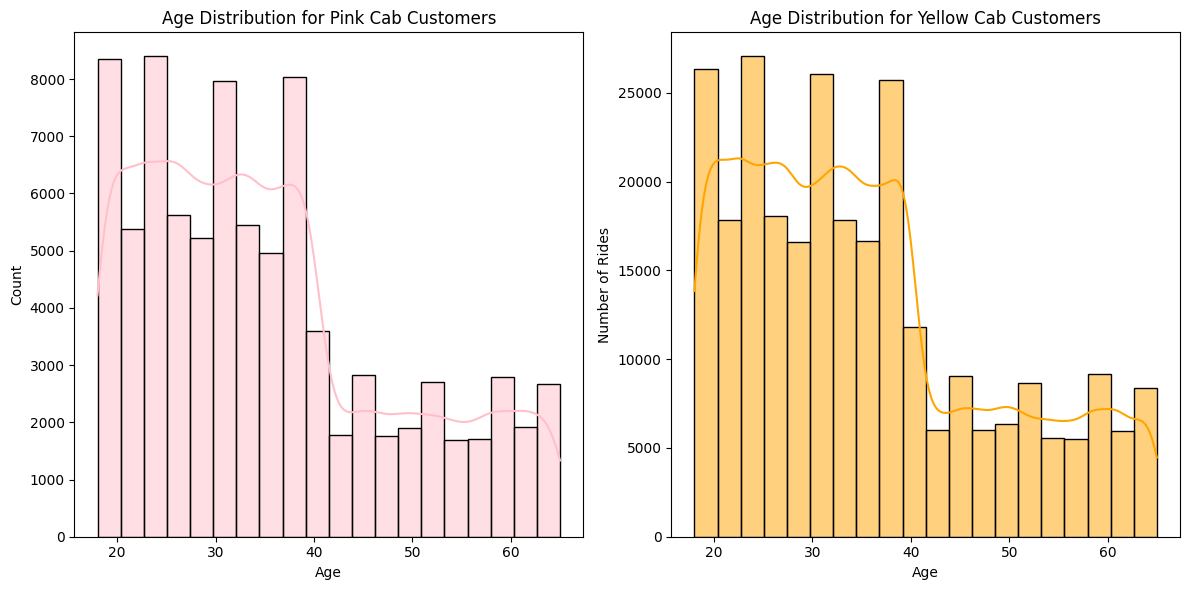

In [228]:
# Filtering data for each cab company
pink_cab_age_dist = master_data[master_data['Company'] == 'Pink Cab']['Age']
yellow_cab_age_dist = master_data[master_data['Company'] == 'Yellow Cab']['Age']

# Plotting the age distributions
plt.figure(figsize=(12, 6))

# Pink Cab Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(pink_cab_age_dist, bins=20, kde=True, color='pink')
plt.title('Age Distribution for Pink Cab Customers')
plt.xlabel('Age')
plt.ylabel('Count')

# Yellow Cab Age Distribution
plt.subplot(1, 2, 2)
sns.histplot(yellow_cab_age_dist, bins=20, kde=True, color='orange')
plt.title('Age Distribution for Yellow Cab Customers')
plt.xlabel('Age')
plt.ylabel('Number of Rides')

plt.tight_layout()
plt.show()

### Total Customer Statistics

<Figure size 1200x600 with 0 Axes>

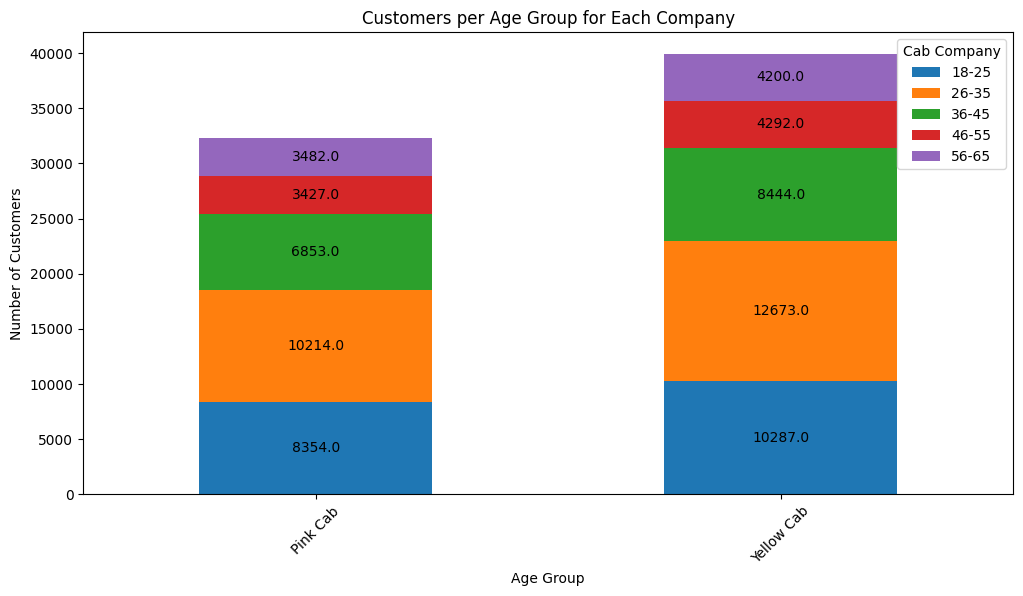

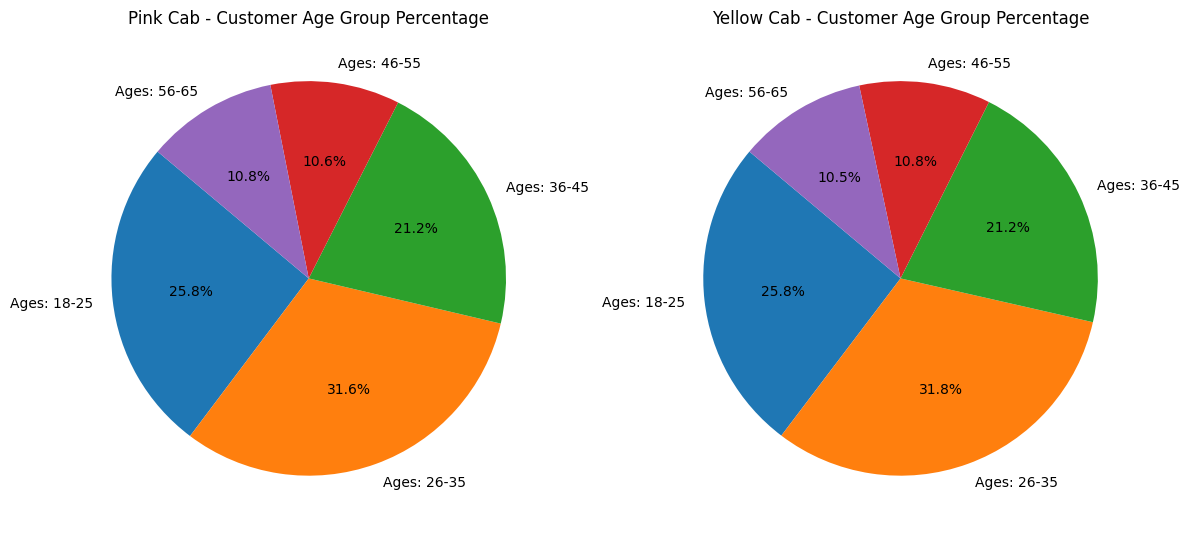

In [229]:
# Adjusting the bins to ensure inclusion of upper ages
adjusted_bins = [18, 26, 36, 46, 56, 66]  # Note the shift by one so both the lower limit and upper limits are included

labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
master_data['Age Group'] = pd.cut(master_data['Age'], bins=adjusted_bins, labels=labels, right=False)

# Group by Age Group and Company
customers_per_age_group = master_data.groupby(['Company', 'Age Group'])['Customer ID'].nunique().unstack()

plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)

ax = customers_per_age_group.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding bar labels for percentages
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f', label_type='center')

plt.title('Customers per Age Group for Each Company')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Cab Company')
plt.show()



# To plot the same data in terms of percentages, I need to calculate the percentage of customers in each age group
# relative to the total number of customers for each company

# First, calculate the total number of customers for each company
total_customers_per_company = master_data.groupby('Company')['Customer ID'].nunique()

# Calculate the percentage of customers in each age group for each company
customers_per_age_group_percentage = customers_per_age_group.div(total_customers_per_company, axis=0) * 100

# Separating the data for each company
pink_cab_age_percentage = customers_per_age_group_percentage.loc['Pink Cab']
yellow_cab_age_percentage = customers_per_age_group_percentage.loc['Yellow Cab']

# Creating pie charts for each company
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

age_group_labels_p = [f"Ages: {age_group}" for age_group in pink_cab_age_percentage.index]
age_group_labels_y = [f"Ages: {age_group}" for age_group in yellow_cab_age_percentage.index]

# Pink Cab pie chart
ax[0].pie(pink_cab_age_percentage, labels=age_group_labels_p, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Pink Cab - Customer Age Group Percentage')

# Yellow Cab pie chart
ax[1].pie(yellow_cab_age_percentage, labels=age_group_labels_y, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Yellow Cab - Customer Age Group Percentage')

# Display the pie charts
plt.show()


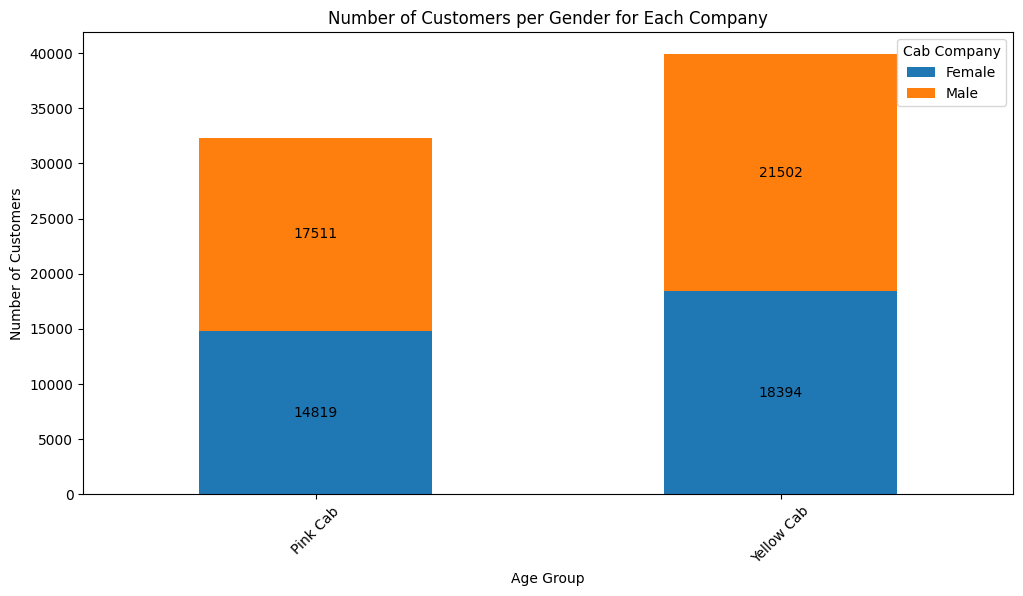

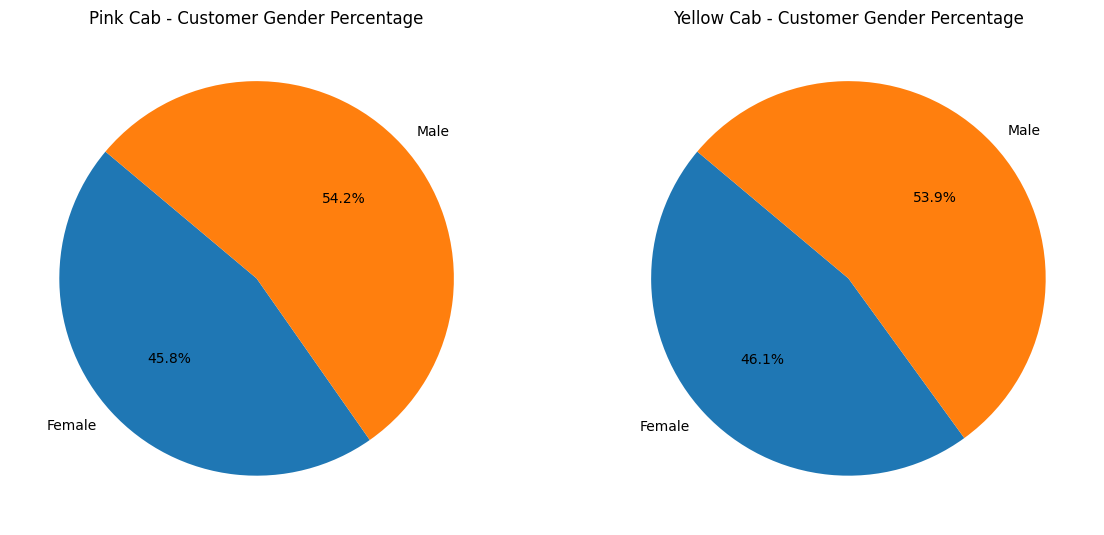

In [230]:
# Group by Age Group and Company
customers_per_gender = master_data.groupby(['Company', 'Gender'])['Customer ID'].nunique().unstack()

# Plotting the stacked bar chart
ax = customers_per_gender.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding bar labels
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='center')

plt.title('Number of Customers per Gender for Each Company')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Cab Company')
plt.show()


# Calculating percentages
customers_per_gender_percentage = customers_per_gender.div(customers_per_gender.sum(axis=1), axis=0) * 100

# Converting the gender percentage data into a pie chart for each company

# Separating the data for each company
pink_cab_gender_percentage = customers_per_gender_percentage.loc['Pink Cab']
yellow_cab_gender_percentage = customers_per_gender_percentage.loc['Yellow Cab']

# Creating pie charts for each company
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pink Cab pie chart
ax[0].pie(pink_cab_gender_percentage, labels=pink_cab_gender_percentage.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Pink Cab - Customer Gender Percentage')

# Yellow Cab pie chart
ax[1].pie(yellow_cab_gender_percentage, labels=yellow_cab_gender_percentage.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Yellow Cab - Customer Gender Percentage')

# Display the pie charts
plt.show()


In [231]:




# Grouping data by Company and Income Group and counting unique customer IDs
customers_per_income_group = master_data.groupby(['Company', 'Income Group'])['Customer ID'].nunique().unstack()

# Calculating the percentage of customers in each income group for each company
customers_per_income_group_percentage = customers_per_income_group.div(customers_per_income_group.sum(axis=1), axis=0) * 100



<Figure size 1200x600 with 0 Axes>

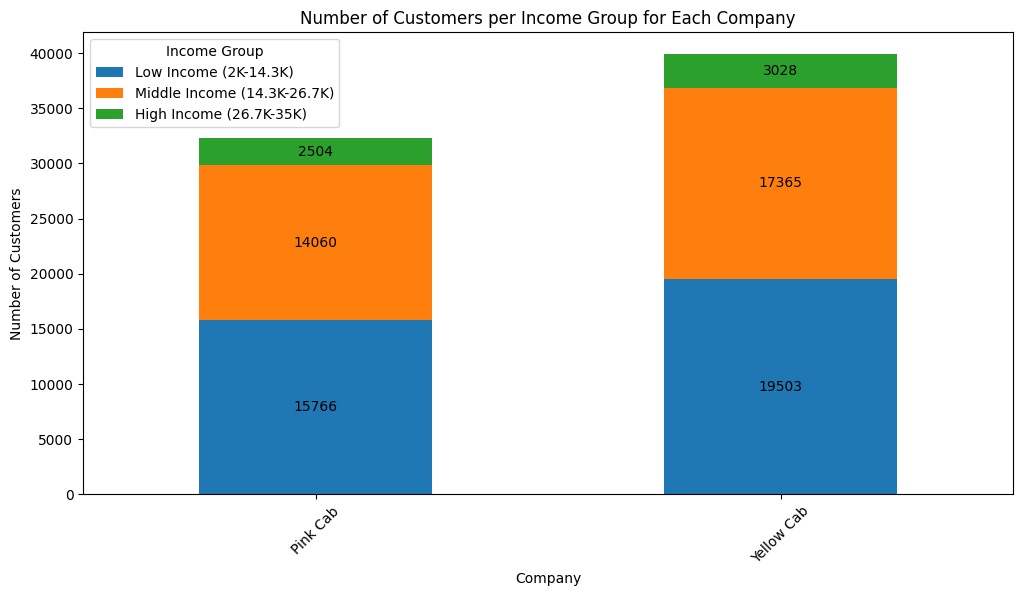

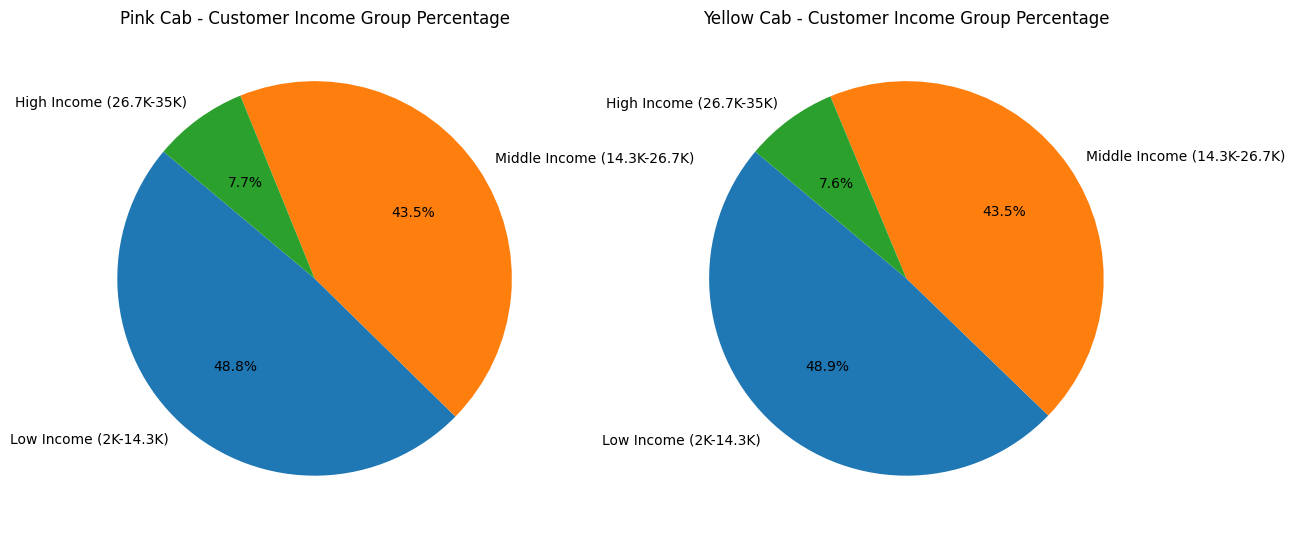

In [232]:
# Creating stacked bar charts for the customer counts and percentages in each income group

# Stacked bar chart for the number of customers in each income group
plt.figure(figsize=(12, 6))
ax1 = customers_per_income_group.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Customers per Income Group for Each Company')
plt.ylabel('Number of Customers')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.legend(title='Income Group')

# Adding bar labels for counts
for c in ax1.containers:
    ax1.bar_label(c, fmt='%d', label_type='center')

plt.show()

# Creating pie charts for the percentage of customers in each income group for each company

# Separating the data for each company
pink_cab_income_percentage = customers_per_income_group_percentage.loc['Pink Cab']
yellow_cab_income_percentage = customers_per_income_group_percentage.loc['Yellow Cab']

# Creating pie charts for each company
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pink Cab pie chart
ax[0].pie(pink_cab_income_percentage, labels=pink_cab_income_percentage.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Pink Cab - Customer Income Group Percentage')

# Yellow Cab pie chart
ax[1].pie(yellow_cab_income_percentage, labels=yellow_cab_income_percentage.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Yellow Cab - Customer Income Group Percentage')

# Display the pie charts
plt.show()




### Impact of Customer Numbers on Margin: Assessing if an increase in the number of customers proportionally increases the margin for the cab companies.

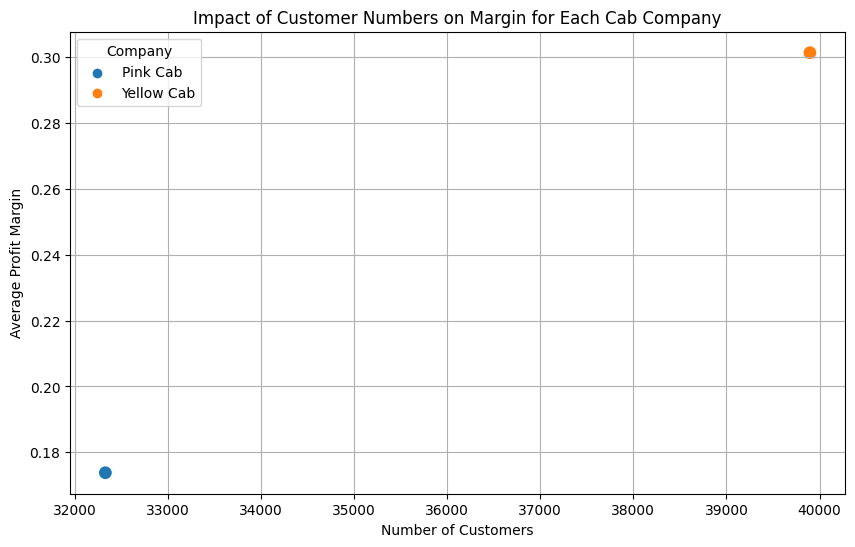

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by company and aggregating the number of unique customers and average margin
company_performance = master_data.groupby('Company').agg({'Customer ID': pd.Series.nunique, 'Margin': 'mean'}).reset_index()
company_performance.rename(columns={'Customer ID': 'Number of Customers', 'Margin': 'Average Margin'}, inplace=True)

# Plotting the relationship between number of customers and average margin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=company_performance, x='Number of Customers', y='Average Margin', hue='Company', s=100)
plt.title('Impact of Customer Numbers on Margin for Each Cab Company')
plt.xlabel('Number of Customers')
plt.ylabel('Average Profit Margin')
plt.legend(title='Company')
plt.grid(True)
plt.show()


### Relationship Between Number of Rides and Profit Margin for Each Company


- Profit Margin vs. Number of Rides: The plot illustrates how the profit margin varies with the number of rides for both "Pink Cab" and "Yellow Cab." While there's some indication of a relationship between the number of rides and profit margins, it's not a straightforward linear correlation. The margin doesn't consistently increase with the number of rides, indicating other factors might be influencing profitability.


- Company Comparison: There is a visible difference in the profit margin behavior between the two companies. The distribution of points for each company suggests different operational efficiencies or pricing strategies.

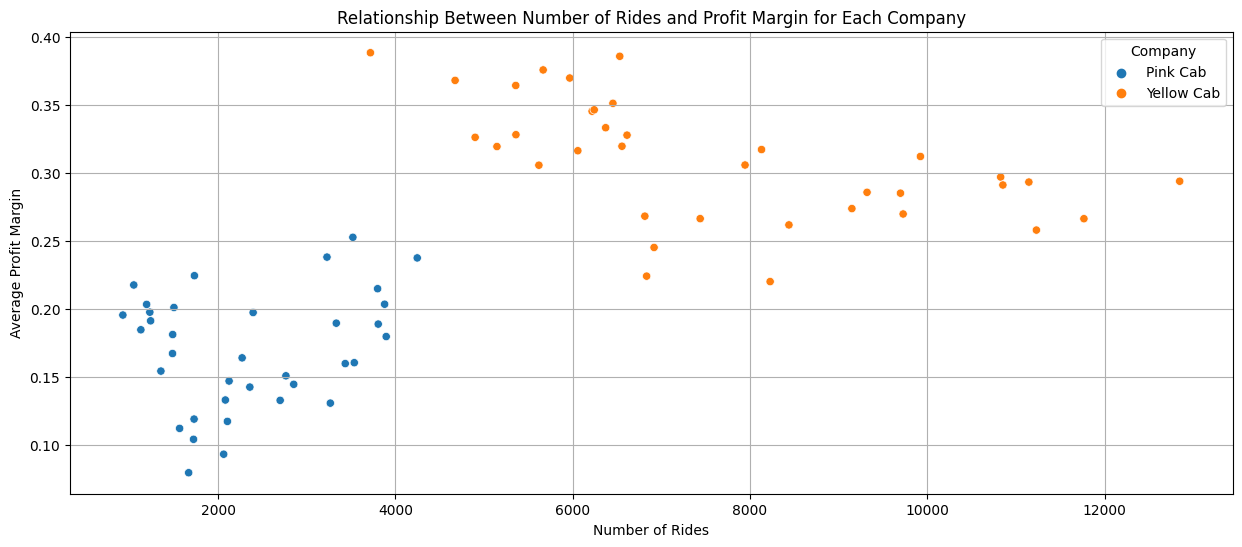

In [234]:
# Grouping data by company and month to calculate average margin and number of rides
company_performance = master_data.groupby(['Year', 'Month', 'Company']).agg({'Margin': 'mean', 'Transaction ID': 'count'}).reset_index()
company_performance.rename(columns={'Transaction ID': 'Number of Rides'}, inplace=True)

# Plotting the relationship between number of rides and margin for each company
plt.figure(figsize=(15, 6))
sns.scatterplot(data=company_performance, x='Number of Rides', y='Margin', hue='Company')
plt.title('Relationship Between Number of Rides and Profit Margin for Each Company')
plt.xlabel('Number of Rides')
plt.ylabel('Average Profit Margin')
plt.legend(title='Company')
plt.grid(True)
plt.show()